In [1]:
import requests
import json
from collections import Counter, defaultdict
from user_agent import generate_user_agent
import numpy as np
import multiprocessing as multi
#from lxml.html import fromstring
#import requests
#from itertools import cycle
#import traceback
import matplotlib.pyplot as plt
import networkx as nx
import csv
from numpy.linalg import eigh
from glob import glob
import pandas

In [6]:
opinions = []
for f_name in glob('scotus/*.json'):
    with open(f_name) as json_data:
        d = json.load(json_data)
        opinions.append(d)  

In [7]:
opinions_df = pandas.DataFrame.from_dict(opinions)

In [8]:
opinions_df.head()

,absolute_url,author,author_str,cluster,date_created,date_modified,download_url,extracted_by_ocr,html,html_columbia,...,id,joined_by,local_path,opinions_cited,page_count,per_curiam,plain_text,resource_uri,sha1,type
0,/opinion/121152/barnes-v-gorman/,http://www.courtlistener.com/api/rest/v3/peopl...,,http://www.courtlistener.com/api/rest/v3/clust...,2010-04-28T17:21:20Z,2017-12-06T00:55:36.016014Z,None,False,"<p class=""case_cite"">536 U.S. 181</p>\n <p ...",None,...,NaN,[],None,[http://www.courtlistener.com/api/rest/v3/opin...,NaN,False,,http://www.courtlistener.com/api/rest/v3/opini...,5cad27defccdffdd40db6a56e936a0cc50c1af1d,010combined
1,/opinion/1211527/lockheed-martin-corp-v-morganti/,None,,http://www.courtlistener.com/api/rest/v3/clust...,2013-10-30T05:01:52.365010Z,2017-03-31T08:28:22.044676Z,None,False,,None,...,NaN,[],None,[http://www.courtlistener.com/api/rest/v3/opin...,NaN,False,,http://www.courtlistener.com/api/rest/v3/opini...,7fbf2842a9e99380bde744dc6f8dfe6f539e4e66,010combined
2,/opinion/121153/united-states-v-drayton/,http://www.courtlistener.com/api/rest/v3/peopl...,,http://www.courtlistener.com/api/rest/v3/clust...,2010-04-28T17:21:20Z,2017-12-06T00:55:35.960939Z,None,False,"<p class=""case_cite"">536 U.S. 194</p>\n <p ...",None,...,NaN,[],None,[http://www.courtlistener.com/api/rest/v3/opin...,NaN,False,,http://www.courtlistener.com/api/rest/v3/opini...,9fc5fdef53d7d3b3e18797cb18f8392025d91815,010combined
3,/opinion/121154/carey-v-saffold/,http://www.courtlistener.com/api/rest/v3/peopl...,,http://www.courtlistener.com/api/rest/v3/clust...,2010-04-28T17:21:20Z,2017-12-06T00:55:38.453470Z,None,False,"<p class=""case_cite"">536 U.S. 214</p>\n <p ...",None,...,NaN,[],None,[http://www.courtlistener.com/api/rest/v3/opin...,NaN,False,,http://www.courtlistener.com/api/rest/v3/opini...,830b91090c0066d6caa3d14b685a21f0112e3962,010combined
4,/opinion/121155/united-states-v-fior-ditalia-inc/,http://www.courtlistener.com/api/rest/v3/peopl...,,http://www.courtlistener.com/api/rest/v3/clust...,2010-04-28T17:21:20Z,2017-12-06T00:59:09.011271Z,None,False,"<p class=""case_cite"">536 U.S. 238</p>\n <p ...",None,...,NaN,[],None,[http://www.courtlistener.com/api/rest/v3/opin...,NaN,False,,http://www.courtlistener.com/api/rest/v3/opini...,2a4d27a6f233e686910b2eb820d824af47772bef,010combined


In [9]:
opinions_sample_df = opinions_df.sample(5000)

In [10]:
opinions_sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 22268 to 11644
Data columns (total 22 columns):
absolute_url           5000 non-null object
author                 1576 non-null object
author_str             4989 non-null object
cluster                5000 non-null object
date_created           5000 non-null object
date_modified          5000 non-null object
download_url           3143 non-null object
extracted_by_ocr       5000 non-null bool
html                   4969 non-null object
html_columbia          7 non-null object
html_lawbox            4969 non-null object
html_with_citations    5000 non-null object
id                     0 non-null float64
joined_by              5000 non-null object
local_path             148 non-null object
opinions_cited         5000 non-null object
page_count             147 non-null float64
per_curiam             5000 non-null object
plain_text             5000 non-null object
resource_uri           5000 non-null object
sha1            

In [24]:
#opinions_sample_df = opinions_sample_df.drop(["html_columbia", "id","page_count", "sha1", "type"], axis=1)
opinions_sample_df.to_csv('opinions_sample.csv', index=False, sep=";")

In [25]:
opinsion_df = pandas.read_csv('opinions_sample.csv', sep=";")

In [26]:
opinsion_df

,absolute_url,author,author_str,cluster,date_created,date_modified,download_url,extracted_by_ocr,html,html_lawbox,html_with_citations,joined_by,local_path,opinions_cited,per_curiam,plain_text,resource_uri
0,/opinion/143119/berwick-v-united-states/,NaN,NaN,http://www.courtlistener.com/api/rest/v3/clust...,2010-04-28T17:37:48Z,2017-03-24T06:27:57.443615Z,http://bulk.resource.org/courts.gov/c/US/544/5...,False,"<p class=""case_cite"">544 U.S. 917</p>\n <p ...",NaN,"<p class=""case_cite""><span class=""citation no-...",[],NaN,[],False,NaN,http://www.courtlistener.com/api/rest/v3/opini...
1,/opinion/122028/morales-v-united-states/,NaN,NaN,http://www.courtlistener.com/api/rest/v3/clust...,2010-04-28T17:21:35Z,2017-03-24T06:13:32.541107Z,http://bulk.resource.org/courts.gov/c/US/536/5...,False,"<p class=""case_cite"">536 U.S. 971</p>\n <p ...",NaN,"<p class=""case_cite""><span class=""citation no-...",[],NaN,[],False,NaN,http://www.courtlistener.com/api/rest/v3/opini...
2,/opinion/92451/calton-v-utah/,http://www.courtlistener.com/api/rest/v3/peopl...,NaN,http://www.courtlistener.com/api/rest/v3/clust...,2010-04-28T16:05:48Z,2017-03-24T03:50:20.863674Z,NaN,False,"<p class=""case_cite"">130 U.S. 83</p>\n <p c...",<div>\n<center><b>130 U.S. 83 (1889)</b></cent...,"<div>\n<center><b><span class=""citation no-lin...",[],NaN,[],False,NaN,http://www.courtlistener.com/api/rest/v3/opini...
3,/opinion/134300/samson-v-lewis-warden/,NaN,NaN,http://www.courtlistener.com/api/rest/v3/clust...,2010-04-28T17:28:48Z,2017-03-24T06:22:12.430678Z,http://bulk.resource.org/courts.gov/c/US/540/5...,False,"<p class=""case_cite"">540 U.S. 1058</p>\n <p...",NaN,"<p class=""case_cite""><span class=""citation no-...",[],NaN,[],False,NaN,http://www.courtlistener.com/api/rest/v3/opini...
4,/opinion/145692/wachovia-bank-na-v-schmidt/,http://www.courtlistener.com/api/rest/v3/peopl...,NaN,http://www.courtlistener.com/api/rest/v3/clust...,2010-05-06T00:06:40Z,2017-12-06T01:01:09.174096Z,http://www.supremecourt.gov/opinions/05pdf/04-...,False,NaN,<div>\n<center><b>546 U.S. 303 (2006)</b></cen...,"<div>\n<center><b><span class=""citation no-lin...",[],pdf/2006/01/17/Wachovia_Bank_N._A._v._Schmidt.pdf,['http://www.courtlistener.com/api/rest/v3/opi...,False,"(Slip Opinion) OCTOBER TERM, 2005...",http://www.courtlistener.com/api/rest/v3/opini...
5,/opinion/89793/hurley-v-jones/,http://www.courtlistener.com/api/rest/v3/peopl...,NaN,http://www.courtlistener.com/api/rest/v3/clust...,2010-04-28T16:02:17Z,2017-03-24T03:46:39.531012Z,NaN,False,"<p class=""case_cite"">97 U.S. 318</p>\n <p c...",<div>\n<center><b>97 U.S. 318 (____)</b></cent...,"<div>\n<center><b><span class=""citation no-lin...",[],NaN,[],False,NaN,http://www.courtlistener.com/api/rest/v3/opini...
6,/opinion/139897/strong-v-mccuskey-judge-united...,NaN,NaN,http://www.courtlistener.com/api/rest/v3/clust...,2010-04-28T17:33:03Z,2017-03-24T06:26:11.291874Z,http://bulk.resource.org/courts.gov/c/US/543/5...,False,"<p class=""case_cite"">543 U.S. 966</p>\n <p ...",NaN,"<p class=""case_cite""><span class=""citation no-...",[],NaN,[],False,NaN,http://www.courtlistener.com/api/rest/v3/opini...
7,/opinion/122421/grid-radio-v-federal-communica...,NaN,NaN,http://www.courtlistener.com/api/rest/v3/clust...,2010-04-28T17:21:44Z,2017-03-24T06:14:03.113771Z,http://bulk.resource.org/courts.gov/c/US/537/5...,False,"<p class=""case_cite"">537 U.S. 815</p>\n <p ...",NaN,"<p class=""case_cite""><span class=""citation no-...",[],NaN,['http://www.courtlistener.com/api/rest/v3/opi...,False,NaN,http://www.courtlistener.com/api/rest/v3/opini...
8,/opinion/140645/hough-v-dretke-director-texas-...,NaN,NaN,http://www.courtlistener.com/api/rest/v3/clust...,2010-04-28T17:33:16Z,2017-03-24T06:26:27.229198Z,http://bulk.resource.org/courts.gov/c/US/543/5...,False,"<p class=""case_cite"">543 U.S. 1024</p>\n <p...",NaN,"<p class=""case_cite""><span class=""citation no-...",[],NaN,[],False,NaN,http://www.courtlistener.com/api/rest/v3/opini...
9,/opini

In [18]:
opinions_df.to_csv('opinions.csv', index=False)

In [4]:
page_link = "https://www.courtlistener.com/api/rest/v3/opinions/"
page_response = requests.get(page_link)
try:
    if page_response.status_code == 200:
        number_of_opinions = page_response.json()["count"]
    else:
        print(page_response.status_code)
        print(str(requests.Timeout))
except requests.Timeout as e:
    print("It is time to timeout")
    print(str(e))

In [5]:
def chunks(n, page_list):
    """Splits the list into n chunks"""
    return np.array_split(page_list,n)
cpus = multi.cpu_count()
workers = []
page_list = ['https://www.courtlistener.com/api/rest/v3/opinions/%i' %i for i in range(number_of_opinions)]
page_bins = chunks(cpus, page_list)

In [6]:
def get_proxies():
    url = 'https://free-proxy-list.net/'
    response = requests.get(url)
    parser = fromstring(response.text)
    proxies = set()
    for i in parser.xpath('//tbody/tr')[:10]:
        if i.xpath('.//td[7][contains(text(),"yes")]'):
            proxy = ":".join([i.xpath('.//td[1]/text()')[0], i.xpath('.//td[2]/text()')[0]])
            proxies.add(proxy)
    return proxies

In [7]:
def perform_extraction(page_ranges):
    #Mine all the opinions from the court listener API
    opinions = defaultdict()
    for page in page_ranges:
        page_response = requests.get(page, proxies={"http": "62.133.191.116", "https": "62.133.191.116"})
        try:
            if page_response.status_code == 200:
                json = page_response.json()
                opinions[json["resource_uri"]] = json["opinions_cited"]
            else:
                print(page_response.status_code)
                print(str(requests.Timeout))
        except requests.Timeout as e:
            print("It is time to timeout")
            print(str(e))
        file_name = multi.current_process().name+'.txt'
        f= open(file_name,"w+")
        f.write(str(opinions))
        f.close() 

In [11]:
for cpu in range(cpus):
    worker = multi.Process(name=str(cpu), 
                           target=perform_extraction, 
                           args=(page_bins[cpu],))
    worker.start()
    workers.append(worker)

for worker in workers:
    worker.join()

{'62.133.191.116:8080', '192.116.142.153:8080', '182.75.71.178:8080', '194.182.74.110:3128', '91.109.150.229:53281', '196.220.96.42:3128', '177.158.85.146:8080'}
{'62.133.191.116:8080', '192.116.142.153:8080', '182.75.71.178:8080', '194.182.74.110:3128', '91.109.150.229:53281', '196.220.96.42:3128', '177.158.85.146:8080'}
{'62.133.191.116:8080', '192.116.142.153:8080', '182.75.71.178:8080', '194.182.74.110:3128', '91.109.150.229:53281', '196.220.96.42:3128', '177.158.85.146:8080'}
{'62.133.191.116:8080', '192.116.142.153:8080', '182.75.71.178:8080', '194.182.74.110:3128', '91.109.150.229:53281', '196.220.96.42:3128', '177.158.85.146:8080'}


Process 0:
Traceback (most recent call last):
  File "/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/urllib3/connectionpool.py", line 595, in urlopen
    self._prepare_proxy(conn)
  File "/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/urllib3/connectionpool.py", line 816, in _prepare_proxy
    conn.connect()
  File "/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/urllib3/connection.py", line 294, in connect
    self._tunnel()
  File "/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/http/client.py", line 919, in _tunnel
    message.strip()))
OSError: Tunnel connection failed: 400 Bad Request

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/pyt

urllib3.exceptions.MaxRetryError: HTTPSConnectionPool(host='www.courtlistener.com', port=443): Max retries exceeded with url: /api/rest/v3/opinions/2043432 (Caused by ProxyError('Cannot connect to proxy.', OSError('Tunnel connection failed: 400 Bad Request',)))

During handling of the above exception, another exception occurred:

  File "/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/requests/api.py", line 72, in get
    return request('get', url, params=params, **kwargs)
Traceback (most recent call last):

During handling of the above exception, another exception occurred:

  File "/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/requests/api.py", line 58, in request
    return session.request(method=method, url=url, **kwargs)
  File "/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/requests/adapters.py", line 440, in send


In [49]:
opinions = []
with open('all.csv', newline='') as f:
    reader = csv.reader(f)
    next(reader, None)  # skip the headers
    for row in reader:
        if len(opinions) < 20000:
            opinions.append(row)

In [50]:
graph = nx.DiGraph()
for opinion in opinions:
    graph.add_edges_from([(opinion[0], opinion[1])])
graph

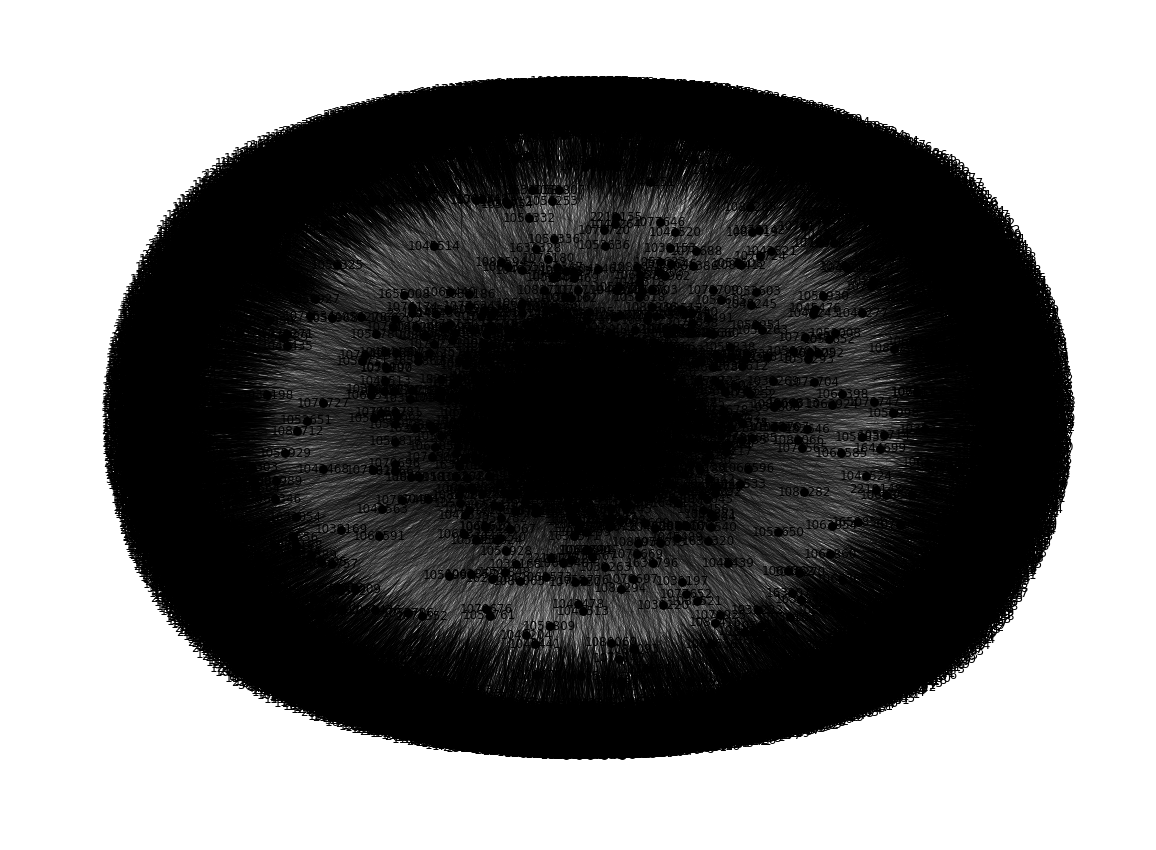

In [51]:
%matplotlib inline
plt.figure(figsize=(20,15))
nx.draw_networkx(graph, node_size=80, pos = nx.spring_layout(graph), node_color='black', linewidths=0, width=0.1)
plt.axis('off')
plt.savefig("opinion-graph", dpi=None, facecolor='w', edgecolor='w',
    orientation='portrait',
    transparent=True, pad_inches=0.1,
    frameon=None)

In [52]:
laplacian = nx.directed_laplacian_matrix(graph)
print(laplacian)

[[  9.99996101e-01  -1.06793440e-01  -1.06793440e-01 ...,  -4.12727241e-05
   -4.12727241e-05  -3.89924355e-06]
 [ -1.06793440e-01   9.99922015e-01  -7.79848709e-05 ...,  -7.83570844e-05
   -7.83570844e-05  -4.51289258e-05]
 [ -1.06793440e-01  -7.79848709e-05   9.99922015e-01 ...,  -7.83570844e-05
   -7.83570844e-05  -4.51289258e-05]
 ..., 
 [ -4.12727241e-05  -7.83570844e-05  -7.83570844e-05 ...,   9.99922015e-01
   -7.79848709e-05  -4.12727241e-05]
 [ -4.12727241e-05  -7.83570844e-05  -7.83570844e-05 ...,  -7.79848709e-05
    9.99922015e-01  -4.12727241e-05]
 [ -3.89924355e-06  -4.51289258e-05  -4.51289258e-05 ...,  -4.12727241e-05
   -4.12727241e-05   9.99996101e-01]]


In [53]:
eig_vals, eig_vectors = eigh(laplacian.A)

In [54]:
print('eigen values\n', eig_vals)
print('eigen vectors\n',np.round(eig_vectors, 2))

eigen values
 [  1.07144408e-15   5.53709065e-01   5.84158729e-01 ...,   1.39466420e+00
   1.41630247e+00   1.44719869e+00]
eigen vectors
 [[-0.01  0.   -0.   ..., -0.   -0.    0.  ]
 [-0.01  0.   -0.   ...,  0.    0.   -0.  ]
 [-0.01  0.   -0.   ...,  0.    0.   -0.  ]
 ..., 
 [-0.01  0.   -0.   ..., -0.   -0.    0.  ]
 [-0.01  0.   -0.   ..., -0.   -0.    0.  ]
 [-0.01  0.   -0.   ..., -0.   -0.    0.  ]]


In [55]:
print('second eigen value=%.2f' % eig_vals[1])
print('second eigen vector=\n%s' % eig_vectors[:,1])
#nx.draw(graph, with_labels=True)

second eigen value=0.55
second eigen vector=
[ 0.00045442  0.00034947  0.00034947 ...,  0.00024673  0.00024673
  0.00089104]


In [56]:
print('third eigen value=%.2f' % eig_vals[2])
print('third eigen vector=\n%s' % eig_vectors[:,2])

third eigen value=0.58
third eigen vector=
[-0.00031287 -0.00022984 -0.00022984 ..., -0.00015461 -0.00015461
 -0.00075755]


In [59]:
print('third eigen value=%.2f' % eig_vals[3])
print('third eigen vector=\n%s' % eig_vectors[:,3])

third eigen value=0.61
third eigen vector=
[ -1.38234152e-04  -9.82591999e-05  -9.82591999e-05 ...,  -6.34057374e-05
  -6.34057374e-05  -4.61780098e-04]


In [63]:
def plot_by_eigenvectors(eig_vectors):
    plt.figure()
    plt.plot(eig_vectors[:,1], eig_vectors[:,2],'o')
    plt.xlabel('second eigenvector value')
    plt.ylabel('third eigenvector value')
    plt.show()

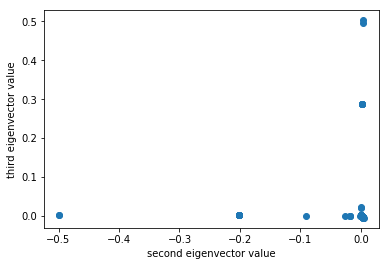

In [64]:
plot_by_eigenvectors(eig_vectors)